In [1]:
!nvidia-smi
import seaborn as sns
sns.set()

Sun Jan 26 18:06:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:1A:00.0 Off |                  N/A |
| 30%   36C    P2    59W / 250W |   9891MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:1B:00.0 Off |                  N/A |
| 31%   49C    P2    79W / 250W |   9909MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [1]:
from tensorflow.keras.models import load_model
from scipy import stats
import tensorflow as tf
import math
import itertools
import operator
from tensorflow.python.keras import backend as k
from tqdm import tqdm, tqdm_notebook, notebook
import numpy as np
from tensorflow.keras import layers
import os
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import random
from random import choice
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import LabelEncoder
from bio import AlignIO
# from Bio.Align import MultipleSeqAlignment
# from Bio.SeqRecord import SeqRecord
# from Bio import SeqIO
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing import sequence
import sklearn
import numpy as np
import re
import pickle
import itertools
import random
import string
from joblib import dump, load

%precision 2

# os.environ["CUDA_VISIBLE_DEVICES"]="6"
context_length = 15
val_loss_hist = []

# K.clear_session()
# keras.backend.clear_session()

ancName = '_HPGPNRMPCCSO'
desName = 'hg38'

anc = str(np.load('prepData/insert2Anc_{}_hg38_chr3.npy'.format(ancName)))[:10000000]
des = str(np.load('prepData/insert2Des_{}_hg38_chr3.npy'.format(ancName)))[:10000000]
anc = np.array(list(anc+'0'))
des = np.array(list(des+'0'))

# with open('label_encoder.pickle', 'rb') as f:
#     label_encoder = pickle.load(f)
# with open('onehot_encoder.pickle', 'rb') as f:
#     onehot_encoder = pickle.load(f)

label_encoder = load('label_encoder.joblib') 
onehot_encoder = load('onehot_encoder.joblib') 

integer_encoded_des = label_encoder.transform(des)
integer_encoded_anc = label_encoder.transform(anc)
integer_des = integer_encoded_des.reshape(len(integer_encoded_des), 1)
encoded_des =onehot_encoder.transform(integer_des)
integer_anc = integer_encoded_anc.reshape(len(integer_encoded_anc), 1)
encoded_anc = onehot_encoder.transform(integer_anc)

print(encoded_des)
print(encoded_anc)

print(len(encoded_des[0]))
encode_dimension= len(encoded_des[0])

print(label_encoder.inverse_transform(range(encode_dimension)))
print(onehot_encoder.transform(np.ones(1).reshape(-1,1)))
key = list(label_encoder.inverse_transform(range(encode_dimension)))

nucleotide = label_encoder.inverse_transform(range(encode_dimension))

/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
86
['!' '"' '$' '%' '&' '(' ')' '*' '+' '-' '.' '/' '0' '1' '2' '3' '4' '5'
 '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 '[' '\\' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'l' 'm'
 'n' 'o' 'p' 'q' 's' 't' 'u' 'w' 'x' 'z' '{' '|' '}' '~']
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
# def splice(input, pad):
#     result = []
#     if pad == False:
#         for i in tqdm(range(len(input)-seq_length-1)):
#             result.append(input[i:i+seq_length])
#     else :
#         for i in range(len(input)-seq_length-1):
#             # print(len(input)-seq_length-1)
#             # print(np.concatenate((onehot_encoder.transform(np.ones(1).reshape(-1,1)), 
#             #                              input[i:i+seq_length-1]), 
#             #                              axis = 0))
#             result.append(np.concatenate((onehot_encoder.transform(np.ones(1).reshape(-1,1)), 
#                                          input[i:i+seq_length-1]), 
#                                          axis = 0)
#                          )
#     return np.array(result)
                          
# sliced_anc = splice(encoded_anc, False)

In [2]:
def decode_sequence(input_seq, model, encoder_model, decoder_model):
    length = len(input_seq)
    nucleotide = label_encoder.inverse_transform(range(encode_dimension))
    index = 0
    initial_context = np.expand_dims(input_seq[0: context_length], axis=0)
    states_value = encoder_model.predict(initial_context)
    target_seq = np.zeros((1, 1, encode_dimension*2))
    target_seq[0][0]= np.hstack((input_seq[0], onehot_encoder.transform(np.ones(1).reshape(-1,1))[0]))
    decoded_seq = ''
    for i in tqdm(range(1, length)):
        if i%context_length == 0 :
            context = np.expand_dims(input_seq[i: i+context_length], axis=0)
            states_value = encoder_model.predict(context)
            
#         stop_condition = False
        
#         while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)
        sampled_token_index = np.random.choice(encode_dimension, 1, p=output_tokens[0, -1, :])[0]
        sampled_nucleotide = nucleotide[sampled_token_index]

        if (sampled_nucleotide == '') or (not sampled_nucleotide.isprintable()) or (sampled_nucleotide.isspace()):
            decoded_seq += '0'
        else :
            decoded_seq += sampled_nucleotide
#         if (len(decoded_seq) == context_length):
#             break

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, encode_dimension*2))
        temp = np.zeros((encode_dimension))
        temp[sampled_token_index] = 1
        target_seq[0][0]= np.hstack((input_seq[i], temp))
        
        if i == length -1:
            output_tokens, h, c = decoder_model.predict(
                [target_seq] + states_value)
            sampled_token_index = np.random.choice(encode_dimension, 1, p=output_tokens[0, -1, :])[0]
            sampled_nucleotide = nucleotide[sampled_token_index]

            decoded_seq += sampled_nucleotide
            

        # Update states
        states_value = [h, c]

    return decoded_seq


model = load_model("models/insert2__HPGPNRMPC_hg38__HPGPNRMPC_hg38_+_10.h5")
encoder_model = load_model("models/E_insert2__HPGPNRMPC_hg38__HPGPNRMPC_hg38_+_10.h5")
decoder_model = load_model("models/D_insert2__HPGPNRMPC_hg38__HPGPNRMPC_hg38_+_10.h5")
decoded_seq = decode_sequence(encoded_anc, model, encoder_model, decoder_model)
print(decoded_seq)

  0%|          | 14895/10000000 [01:08<12:46:05, 217.23it/s]

KeyboardInterrupt: 

In [ ]:
np.save('simulated_{}.npy'.format(ancName), decoded_seq)
print(len(encoded_anc))
for i in range(2000):
    print(anc[i], des[i], decoded_seq[i])

In [3]:
def load_seq(chromList):
    inputAll = ''
    predAll = ''
    outputAll = ''
    for chromosome in chromList:
        inputAll += str(np.load('prepData/insert2Anc_{}_hg38_chr{}.npy'.format(ancName,chromosome)))#[:10000000]
        outputAll += str(np.load('prepData/insert2Des_{}_hg38_chr{}.npy'.format(ancName,chromosome)))#[:10000000]
        predAll += str(np.load('prepData/simulated_{}_-1_chr{}.npy'.format(ancName, chromosome)))#[:10000000]
        print(len(inputAll), len(outputAll), len(predAll))
        print(inputAll[-10:], outputAll[-10:], predAll[-10:])
    return [inputAll], [outputAll], [predAll]

# def load_seq(chromList):
#     inputAll = ''
#     predAll = ''
#     outputAll = ''
#     for chromosome in chromList:
#         inputAll += str(np.load('prepData/insert2Anc_{}_hg38_chr{}.npy'.format(ancName,chromosome)))[:10000000]
#         outputAll += str(np.load('prepData/insert2Des_{}_hg38_chr{}.npy'.format(ancName,chromosome)))[:10000000]
#         predAll += str(np.load('simulated_{}_10000000_chr{}.npy'.format(ancName, chromosome)))[:10000000]
#     return [inputAll], [outputAll], [predAll]
    
mut_dict = np.load('mut_dict_insert2.npy',allow_pickle=True).item()
inv_dict = {v: k for k, v in mut_dict.items()}
print(inv_dict)

inputAll, outputAll, predAll = load_seq([1,3,4,5,6,7,8,9,12,14,15,16,17,19,20,21,22])
# decoded_seq = str(np.load('simulated_{}_10000000_chr{}.npy'.format(ancName, chromosome)))
# inputAll =[''.join(anc)[:-1]]
# predAll = [decoded_seq[:-1]]
# outputAll = [''.join(des)[:-1]]
lstm_inputAll = [''.join(anc)[:2000000]]
lstm_predAll = [str(np.load('simulated_{}_lstm.npy'.format(ancName)))]
lstm_outputAll = [''.join(des)[:2000000]]
contextLen = 2
numBin = 10
def contextMut(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont = list(itertools.product('ACGT', repeat=size))
    cont1 = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont1:
        for j in cont1:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc :
                count_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc and b[i+size+int(len(ancNuc)/2)] == desNuc:
                context_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def contextMutInsert(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont1 = list(itertools.product('ACGT', repeat=size-1))
    cont = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont:
        for j in cont:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            count_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            inserted_nuc = inv_dict[b[i+size+int(len(ancNuc)/2)-1]]
            if len(inserted_nuc) >1 and inserted_nuc[1] == desNuc:
                context_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def decodeList(inputAll, predAll, outputAll):
    inp =[]
    inp2 = []
    pre = []
    out = []
    for i, p, o in tqdm(zip(inputAll, predAll, outputAll)):
        input, pred = decodeDictSeq(i, p, mut_dict)
        input2, output = decodeDictSeq(i,o, mut_dict)
        inp.append(input)
        inp2.append(input2)
        pre.append(pred)
        out.append(output)
    return inp, inp2, pre, out

def valueFloat(data_list):
    newDict = dict(zip(data_list.keys(), [float(value) for value in data_list.values()]))
    return newDict
def plotPointMut(n_groups,ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    true = list(trueSeq.values())[:n_groups]
    true_context = list(trueSeq.keys())[:n_groups]
    pred = []
    evol = []
    lstm = []
    for i in true_context:
        pred.append(predSeq[i])
#         evol.append(evolSeq[i])
        lstm.append(lstmSeq[i])

    # create plot
    fig, ax = plt.subplots(figsize=(20, 10))
    index = np.arange(n_groups)
    bar_width = 0.05
    opacity = 0.8

    rects1 = plt.bar(index, pred, bar_width,
    alpha=opacity,
    color='b',
    label='seq2seq_pred')
    
    rects2 = plt.bar(index + bar_width, lstm, bar_width,
    alpha=opacity,
    color='m',
    label='lstm_pred')
    
    rects3 = plt.bar(index + bar_width*2, true, bar_width,
    alpha=opacity,
    color='g',
    label='true')
    
#     rects3 = plt.bar(index + bar_width*3, evol, bar_width,
#     alpha=opacity,
#     color='r',
#     label='evol_pred')

    plt.xlabel('context')
    plt.ylabel('rate')
    plt.title('{} to {} point mutation'.format(ancNuc, desNuc))
    plt.xticks(index + bar_width, list(trueSeq.keys())[:n_groups])
    plt.legend()

    #plt.tight_layout()
    plt.show()
    plt.close()

def plotScatter(n_groups, ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    true = list(trueSeq.values())
    true_context = list(trueSeq.keys())
    pred = []
    evol = []
    lstm = []
    for i in true_context:
        pred.append(predSeq[i])
#         evol.append(evolSeq[i])
        lstm.append(lstmSeq[i])
    f, (ax1, ax3) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,7))
    f.text(0.5, 0.15, 'True', ha='center', va='center')
    f.text(0.05, 0.5, 'Predicted', ha='center', va='center', rotation='vertical')
    ax1.scatter(true, pred, color = 'm', label = 'RNNEvolver')

    ax1.axis('scaled')
    ax1.axis('square')
    ax1.set_title('{} to {} point mutation'.format(ancNuc, desNuc))
    for i, txt in enumerate(list(trueSeq.keys())):
        if i%20 == 0:
            ax1.annotate(txt, (true[i], pred[i]))

    ax1.legend()
    
    
    ax3.scatter(true, lstm, color = 'k', label = 'lstm')
    for i, txt in enumerate(list(lstmSeq.keys())):
        if i%20 == 0:
            ax3.annotate(txt, (true[i], lstm[i]))

    ax3.axis('scaled')
    ax3.axis('square')
    ax3.legend()
    ax3.set_title('{} to {} point mutation'.format(ancNuc, desNuc))
    f.savefig('figures/scatter_{}_{}_{}->{}.png'.format(ancName, desName,  ancNuc, desNuc))
    f.show()
    plt.show()
    plt.close()
    print(stats.pearsonr(pred, true), stats.pearsonr(lstm, true))
            

# np.save('inputAll_{}_{}'.format(ancName, desName), inputAll)
# np.save('predAll_{}_{}'.format(ancName, desName), predAll)
# np.save('outputAll_{}_{}'.format(ancName, desName), outputAll)

{'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T', '-': '-', '0': '0', '^': 'AAA', 'f': 'AAC', '4': 'AAT', 'B': 'AAG', 'w': 'ACA', 't': 'ACC', 'i': 'ACT', 'e': 'ACG', '.': 'ATA', 'c': 'ATC', '>': 'ATT', 'X': 'ATG', '5': 'AGA', '|': 'AGC', '[': 'AGT', 's': 'AGG', 'u': 'CAA', '(': 'CAC', '=': 'CAT', 'q': 'CAG', 'W': 'CCA', '_': 'CCC', '!': 'CCT', '{': 'CCG', '1': 'CTA', 'Q': 'CTC', 'U': 'CTT', 'b': 'CTG', 'M': 'CGA', ';': 'CGC', 'm': 'CGT', '~': 'CGG', 'a': 'TAA', ']': 'TAC', '&': 'TAT', ')': 'TAG', '7': 'TCA', '6': 'TCC', 'p': 'TCT', '%': 'TCG', 'n': 'TTA', 'P': 'TTC', 'F': 'TTT', 'h': 'TTG', '3': 'TGA', ':': 'TGC', 'z': 'TGT', '8': 'TGG', 'R': 'GAA', 'S': 'GAC', '/': 'GAT', 'j': 'GAG', 'o': 'GCA', 'd': 'GCC', '@': 'GCT', 'L': 'GCG', '}': 'GTA', 'H': 'GTC', 'Y': 'GTT', 'x': 'GTG', '"': 'GGA', 'I': 'GGC', '\\': 'GGT', 'J': 'GGG', '9': 'AA', '`': 'AC', 'l': 'AT', '<': 'AG', 'N': 'CA', 'V': 'CC', 'D': 'CT', '+': 'CG', 'E': 'TA', 'Z': 'TC', '$': 'TT', '?': 'TG', '2': 'GA', 'K': 'GC', '*': 'GT', 'g': 

/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


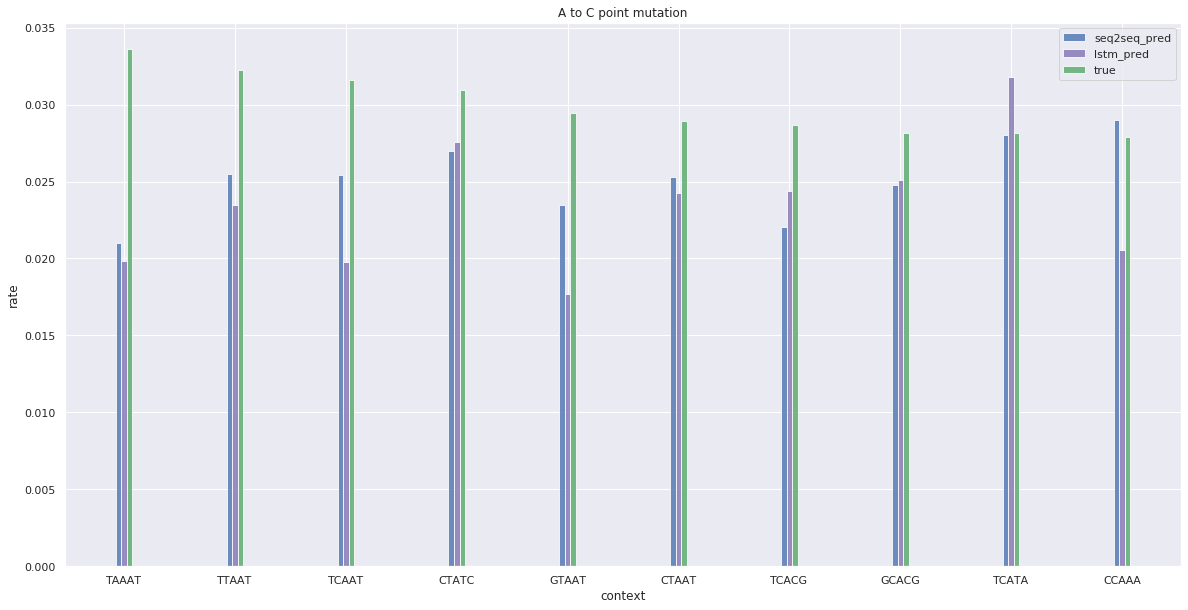

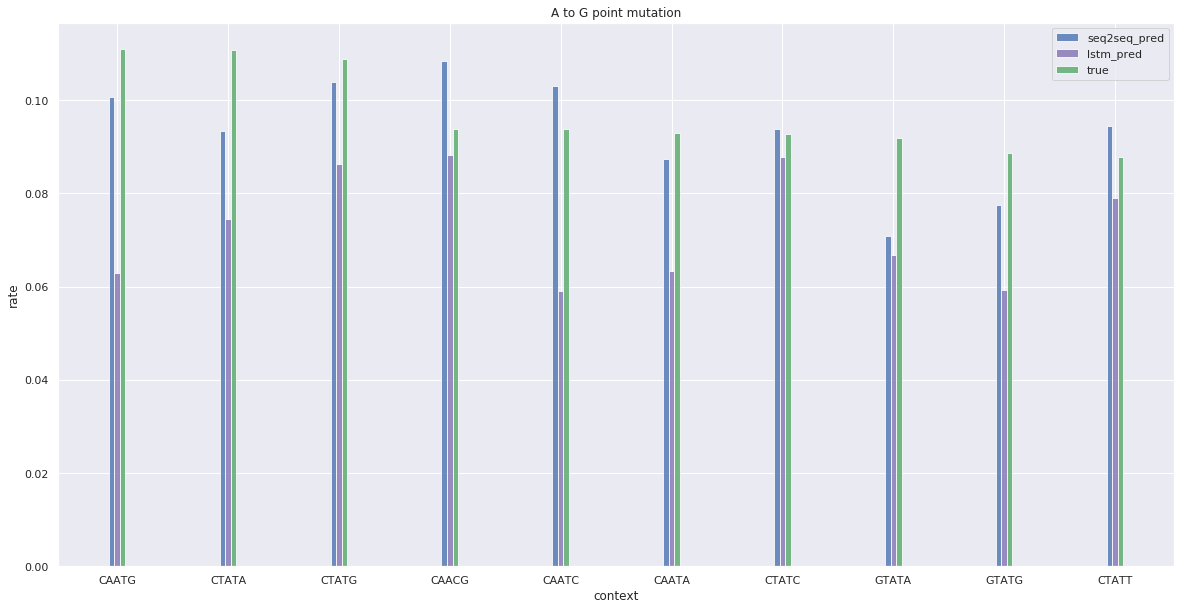

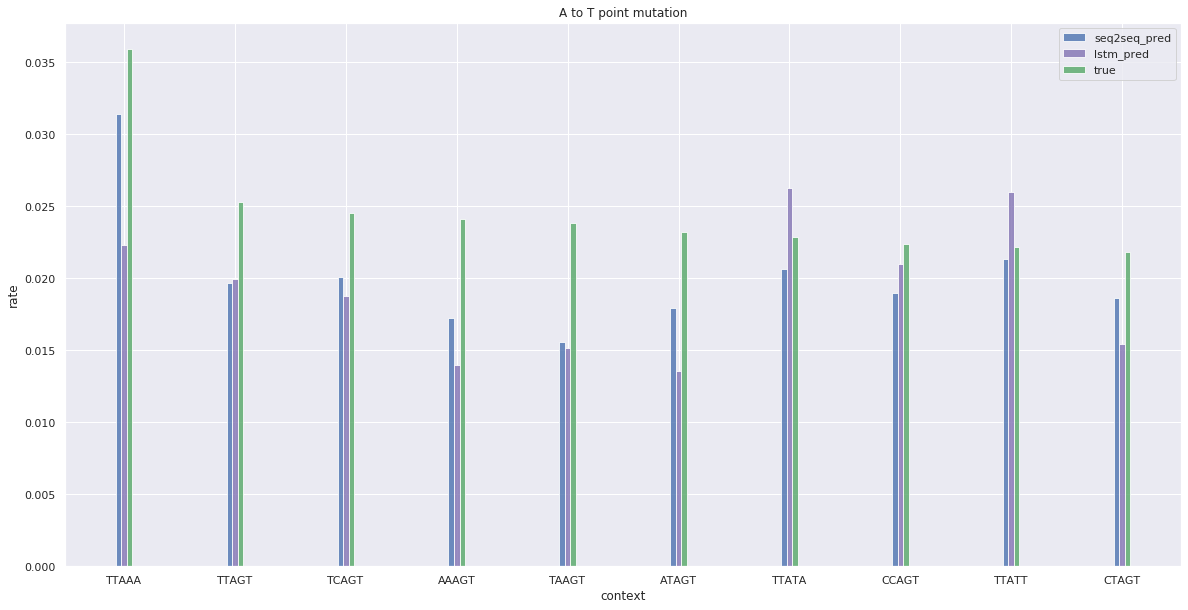

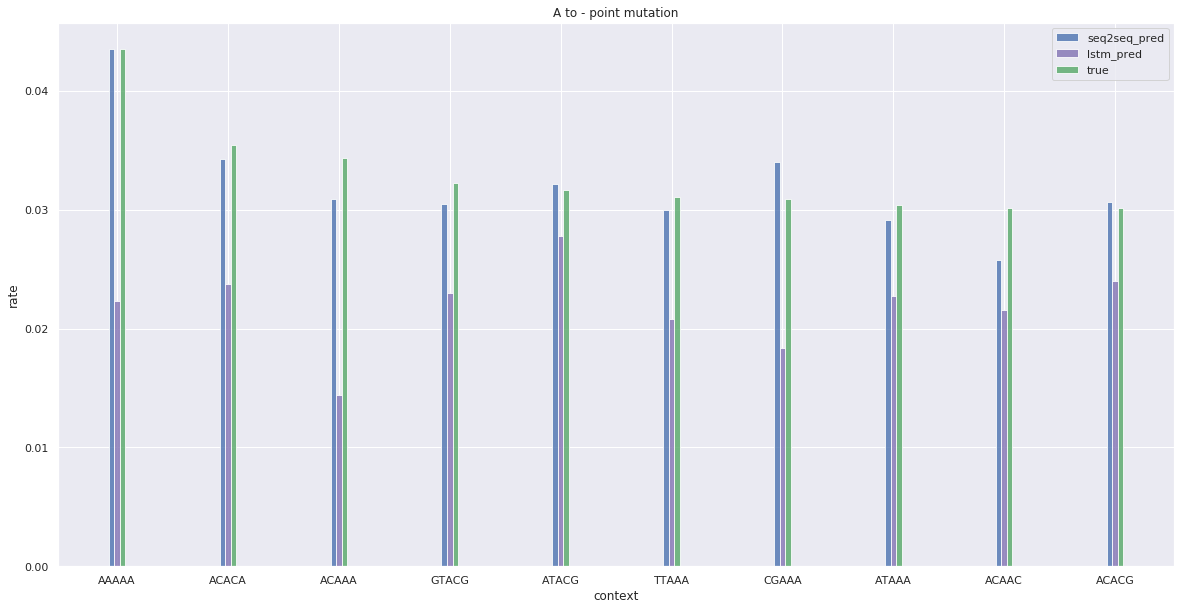

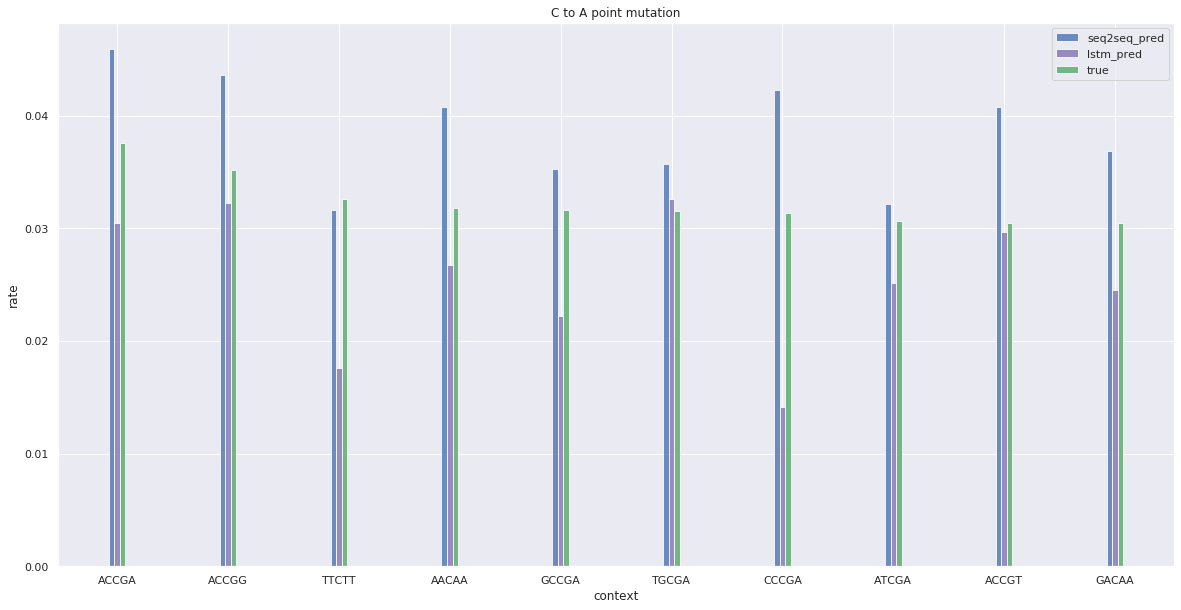

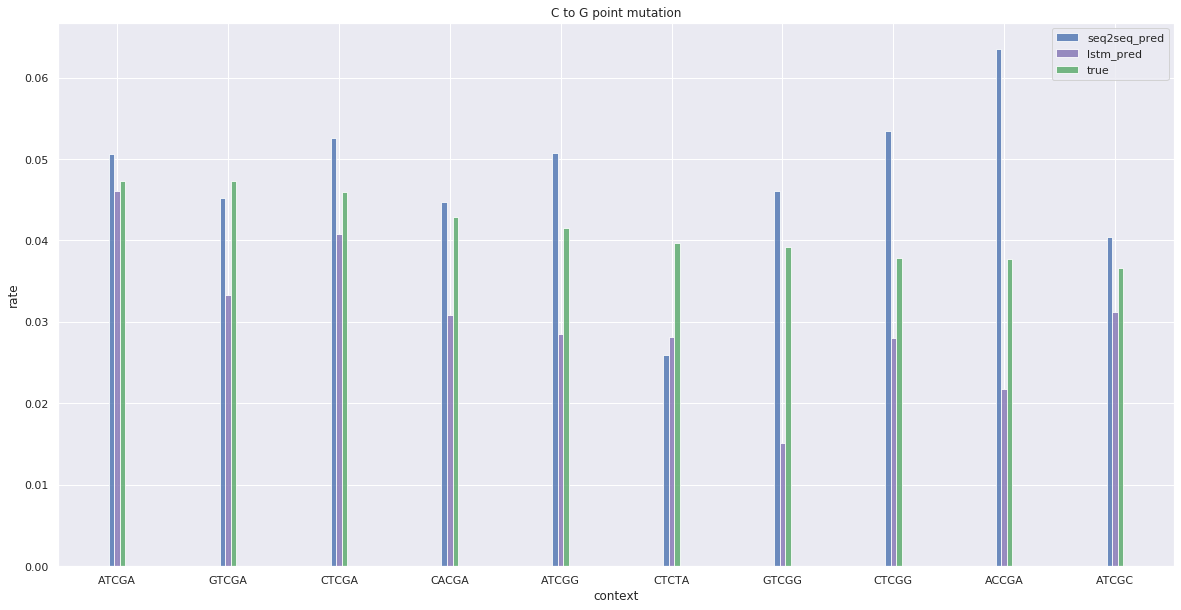

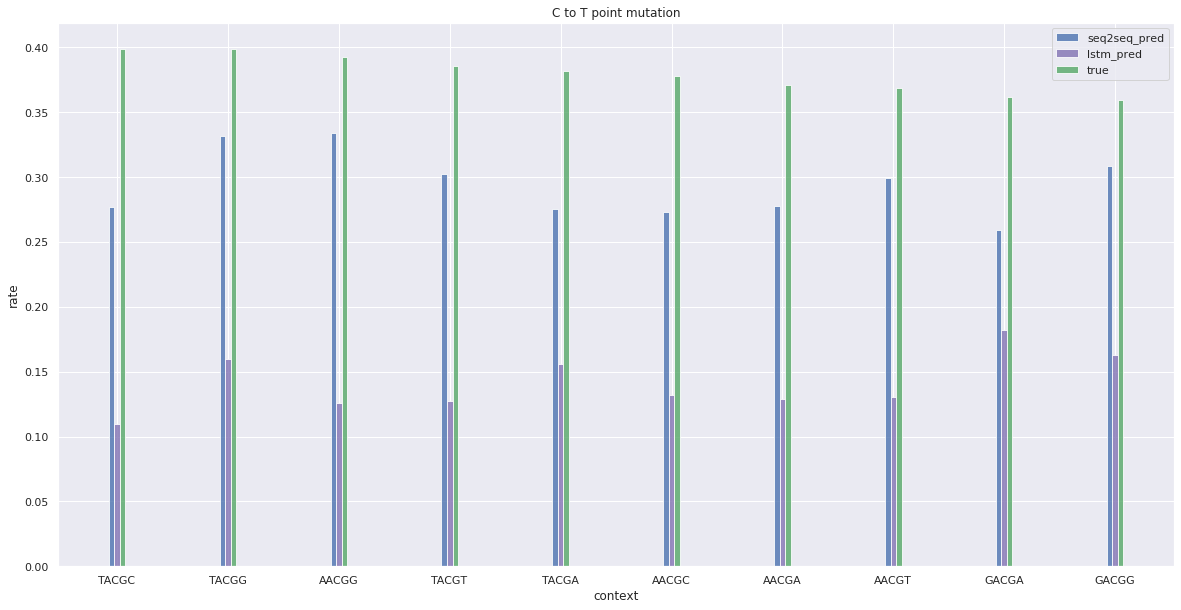

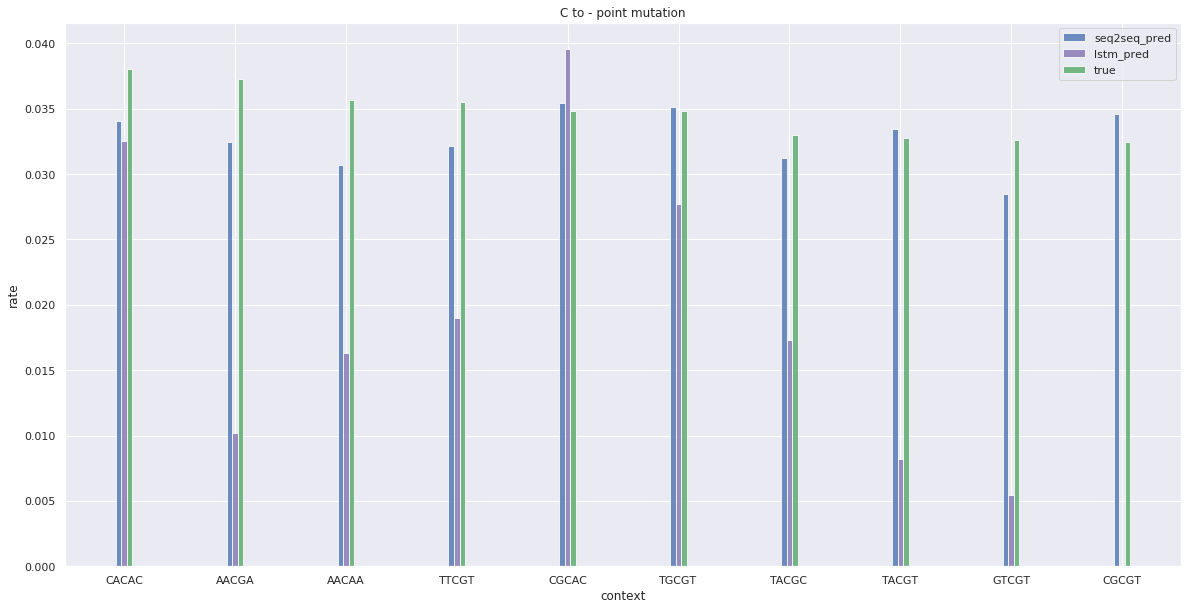

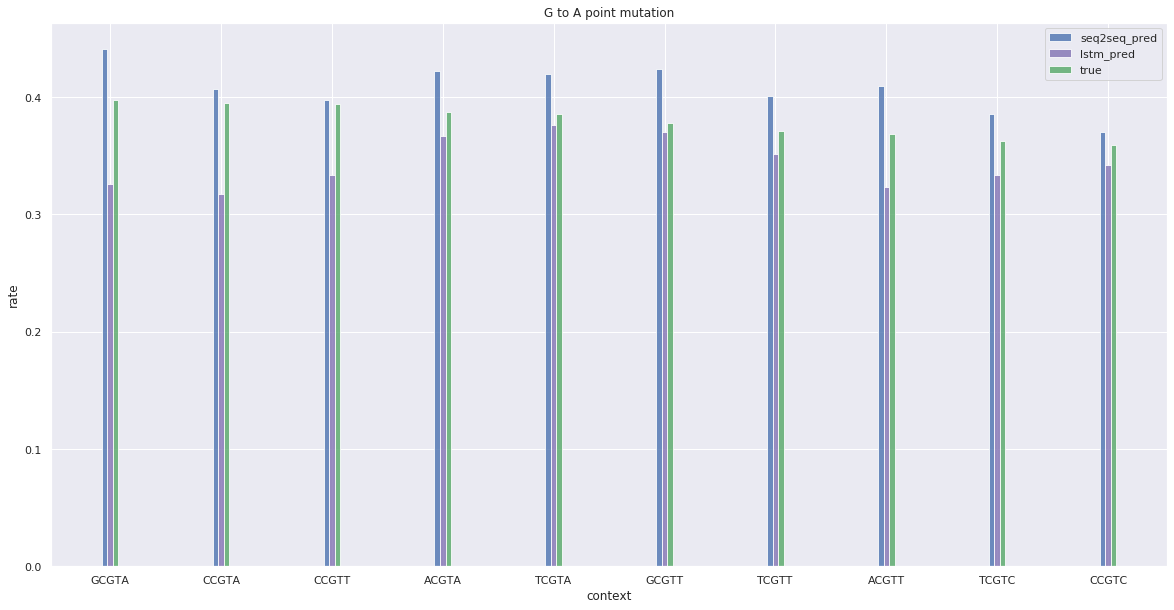

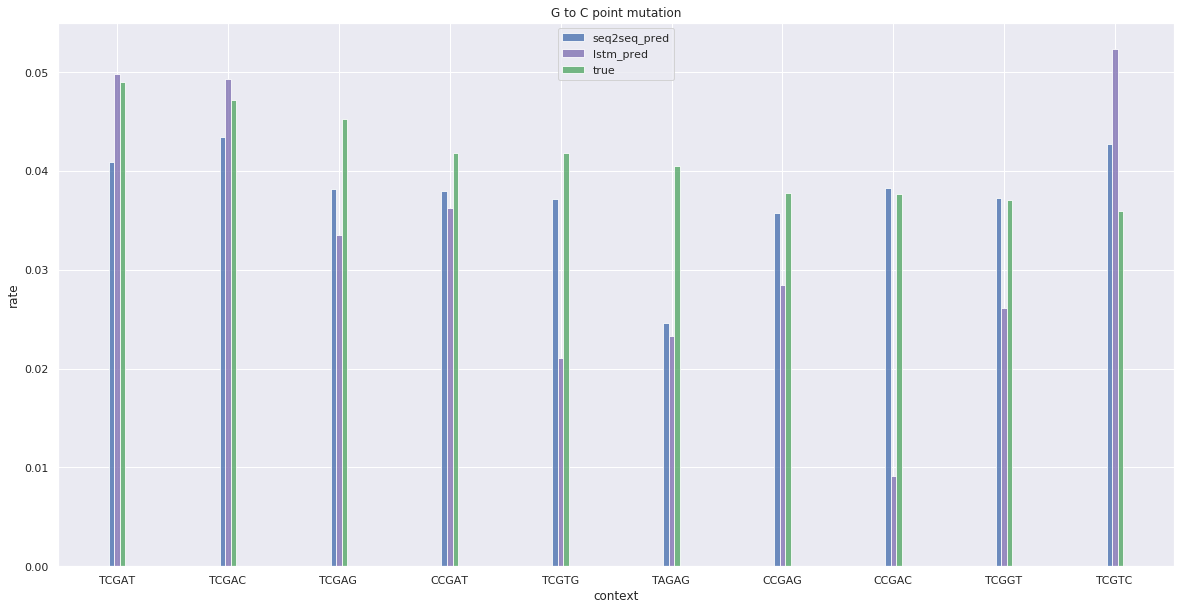

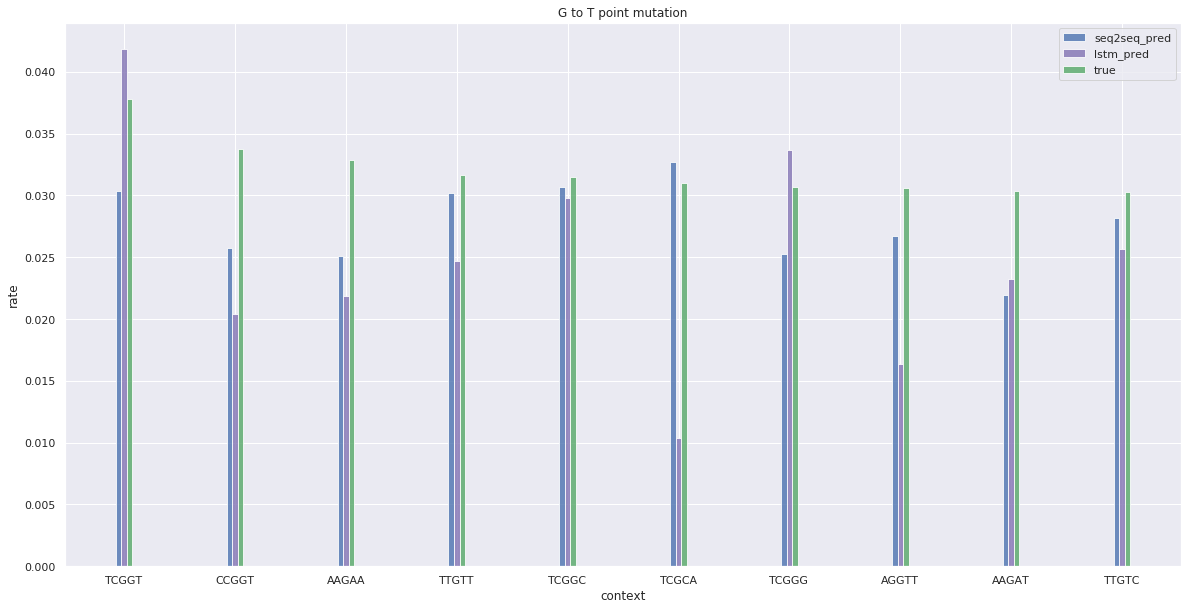

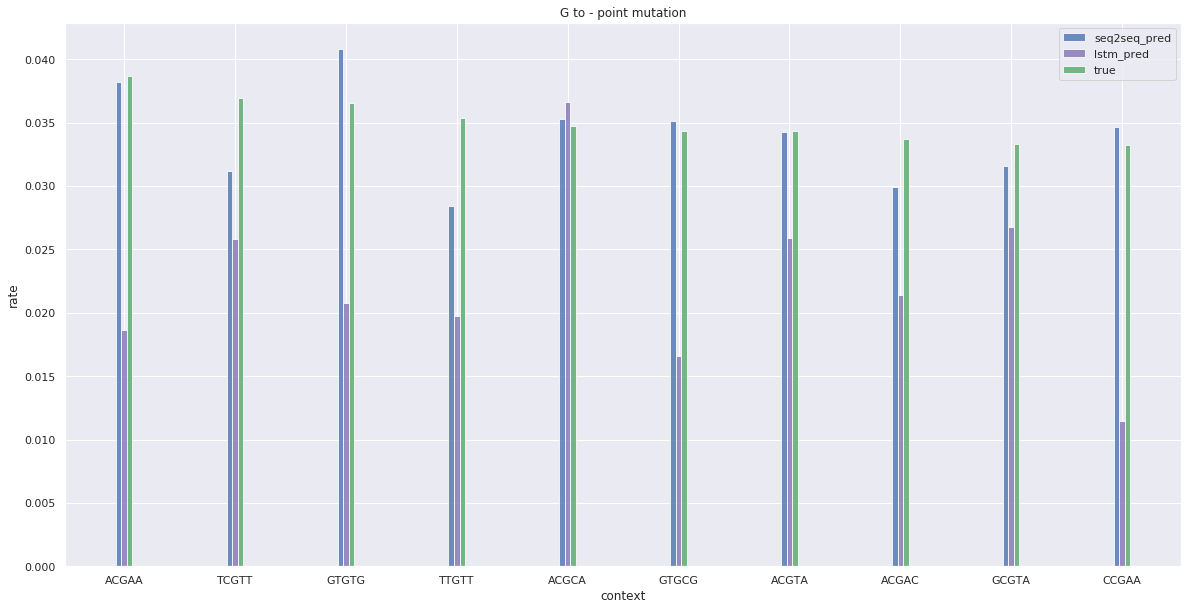

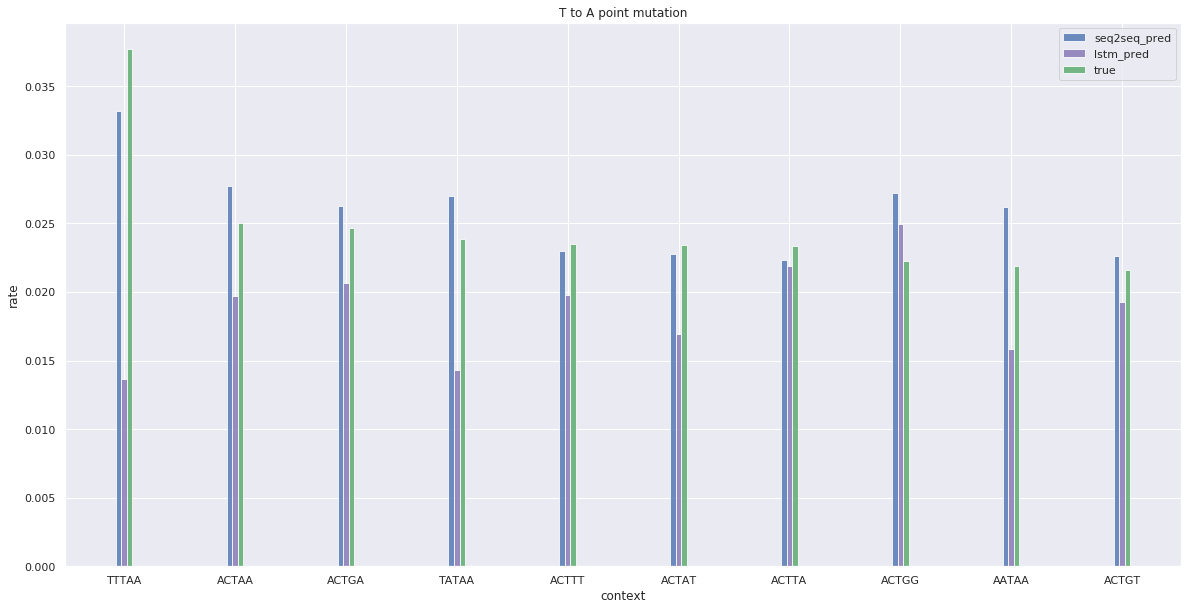

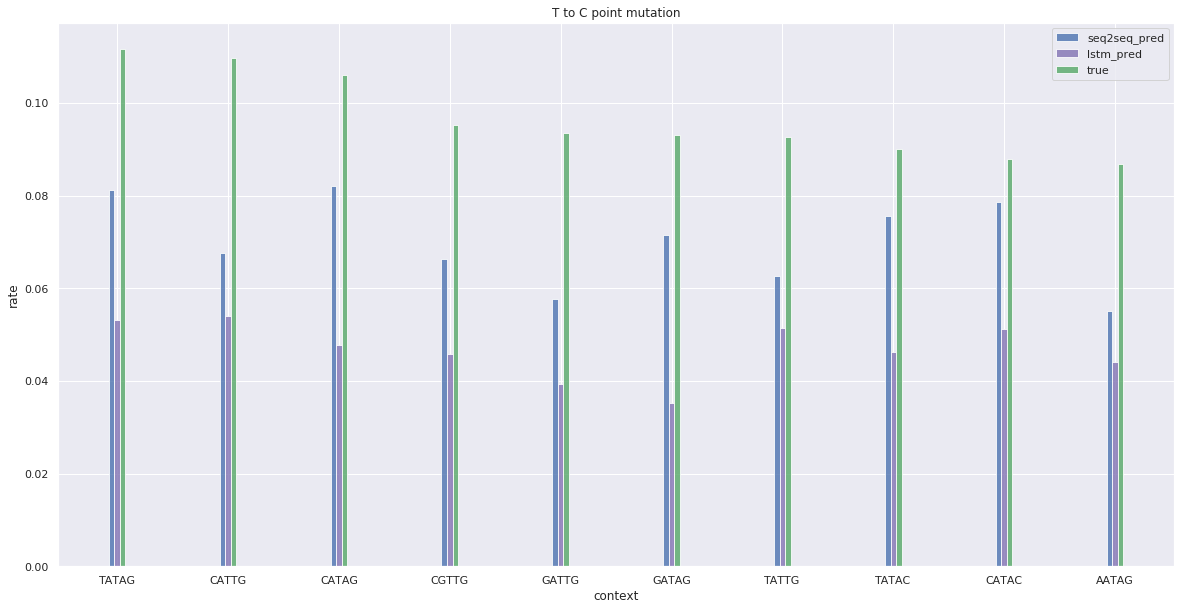

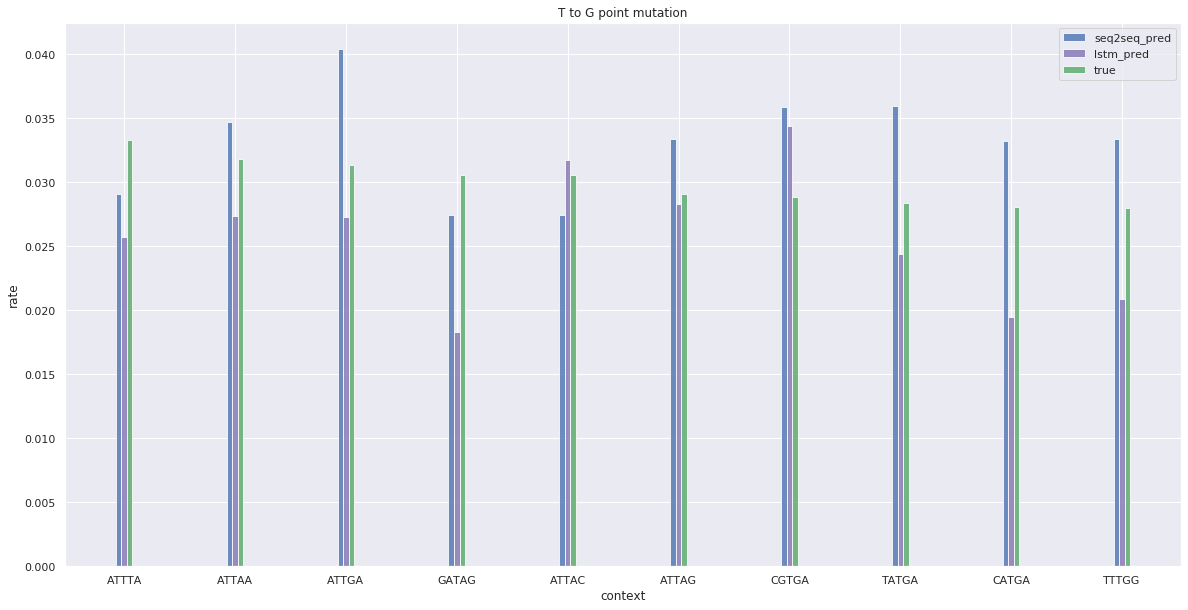

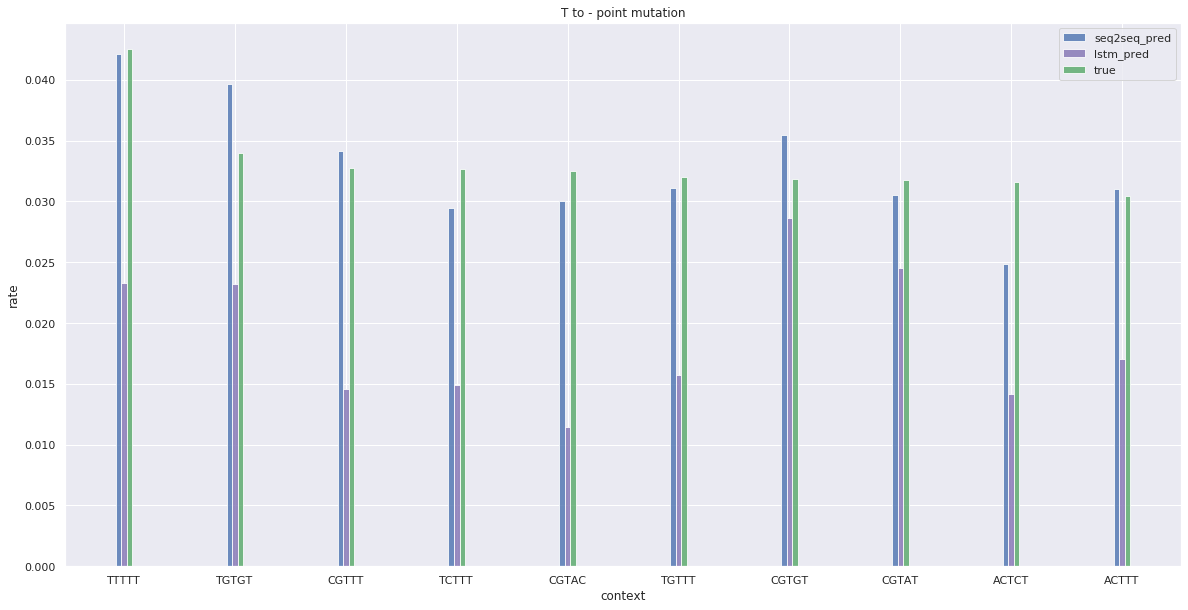

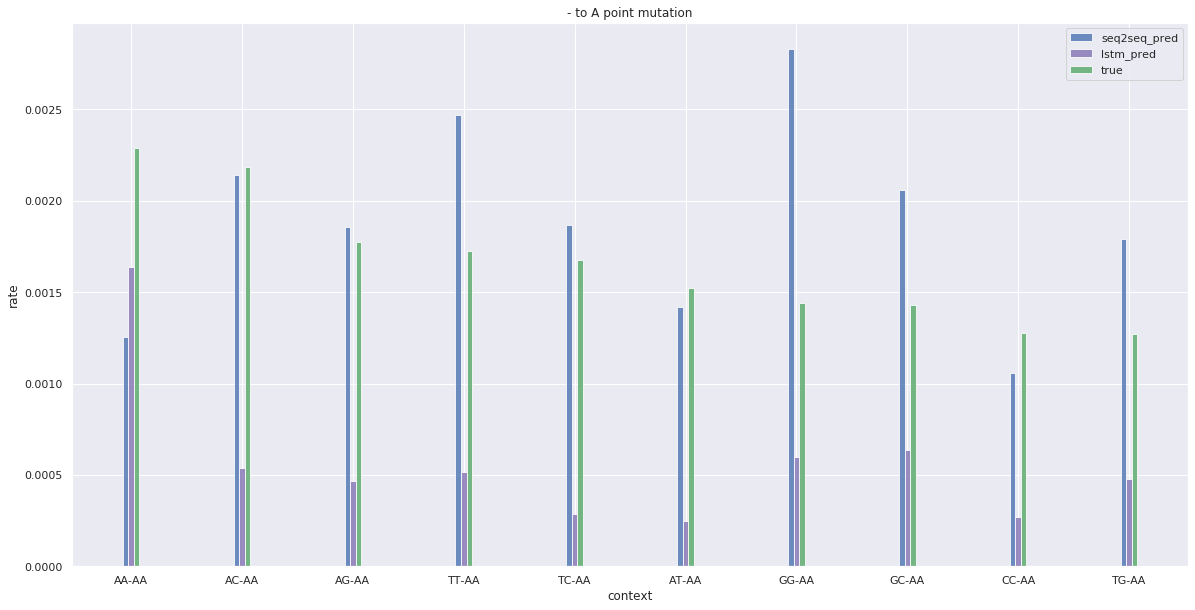

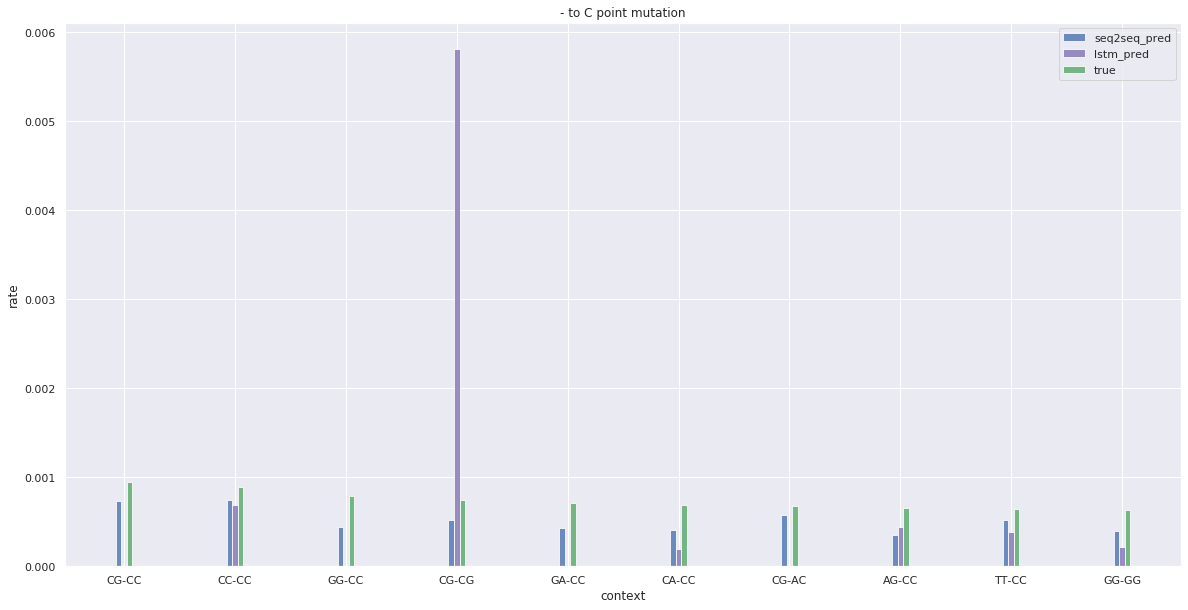

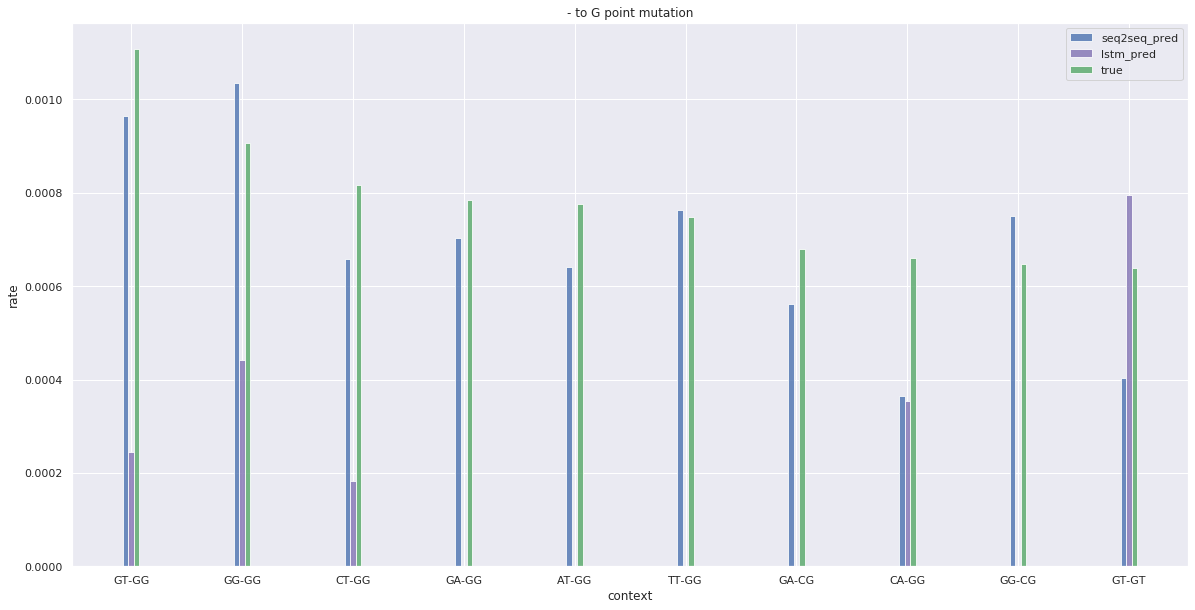

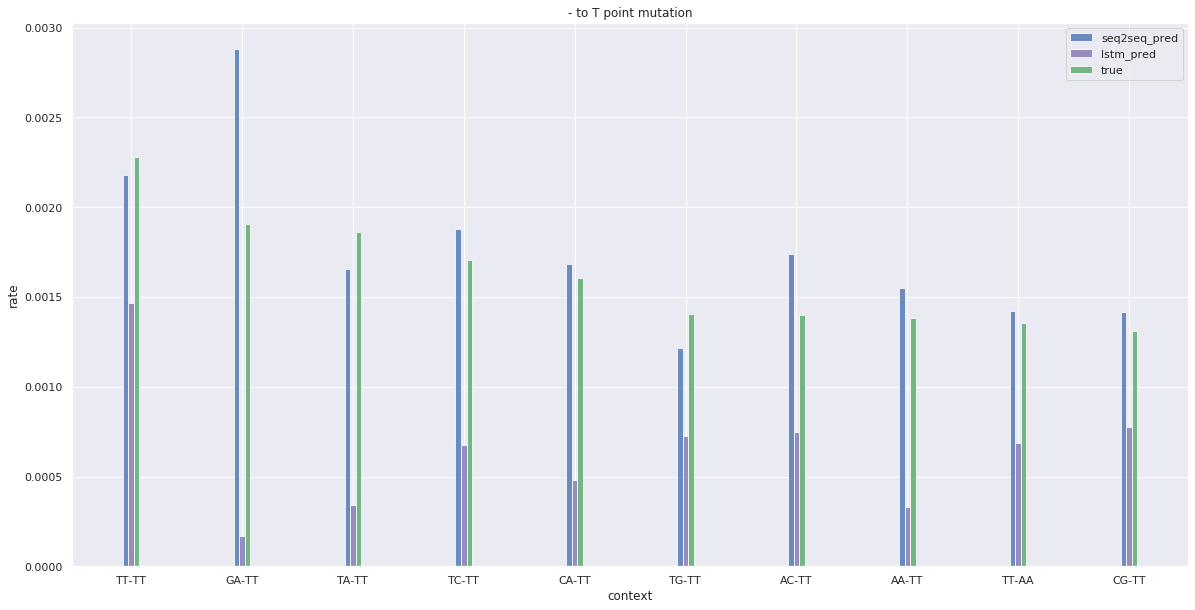

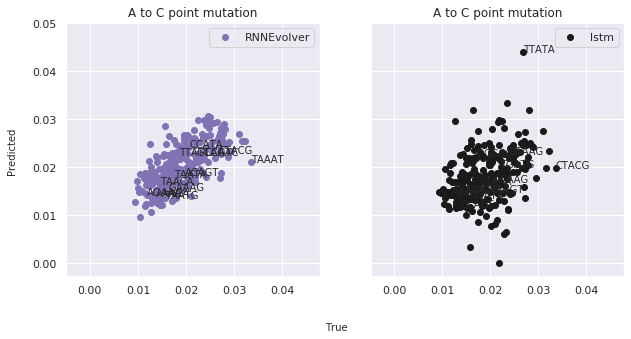

(0.6603637537636369, 1.9131085796053383e-33) (0.3762613597316662, 4.945567231052713e-10)


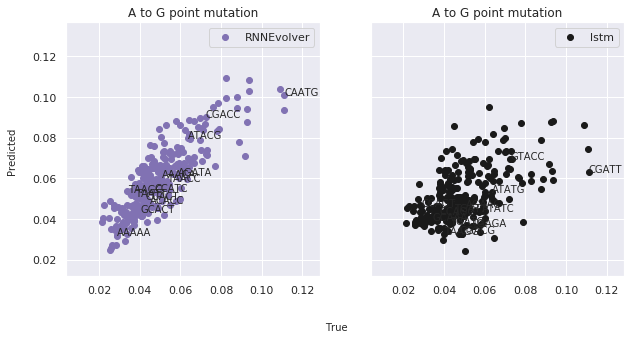

(0.843435390386955, 1.7107691548018993e-70) (0.551140831187676, 9.654202717116698e-22)


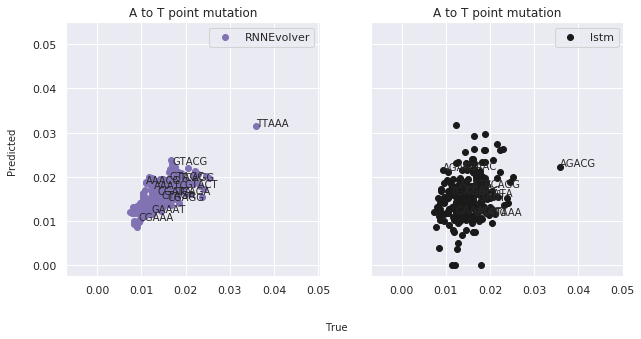

(0.7274431094660077, 1.9459731886925335e-43) (0.30111368485591533, 9.171050907822724e-07)


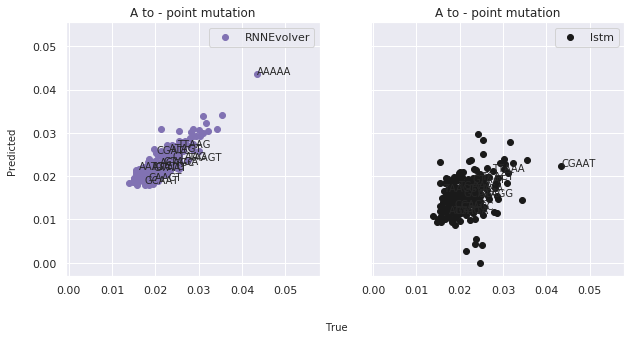

(0.8643138331323664, 8.9081059627509e-78) (0.3604959057081486, 2.8388752641094097e-09)


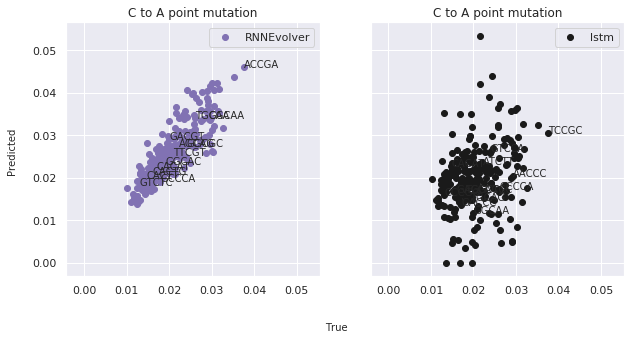

(0.8502881217402829, 9.24327235592762e-73) (0.2670216999708924, 1.4889069788219638e-05)


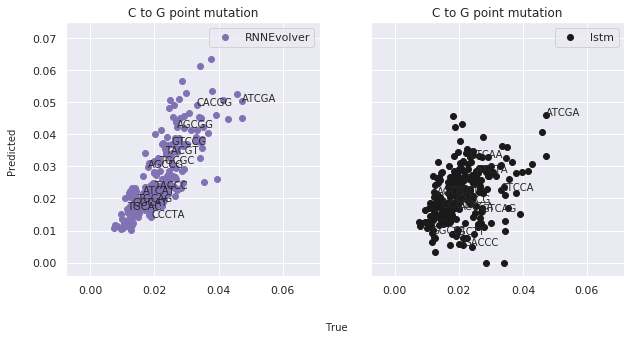

(0.8119658051354048, 2.5223965006748478e-61) (0.4016801187647587, 2.4085776413776508e-11)


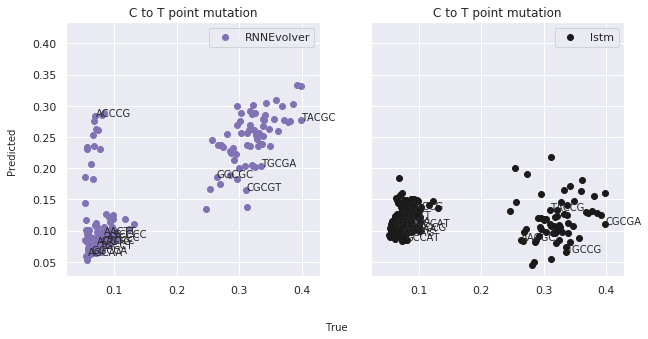

(0.8378377243465702, 1.0135764714677257e-68) (0.06634994103140526, 0.2902517094710171)


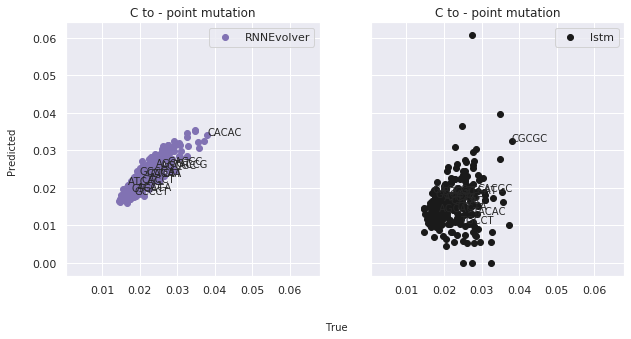

(0.8843941402934326, 4.980018319440503e-86) (0.20210558214667135, 0.0011480473922514452)


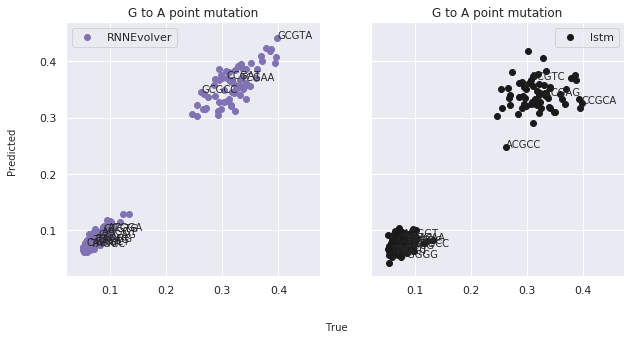

(0.9917240112438456, 1.8531303527915168e-228) (0.9750838521738578, 4.003165487020923e-168)


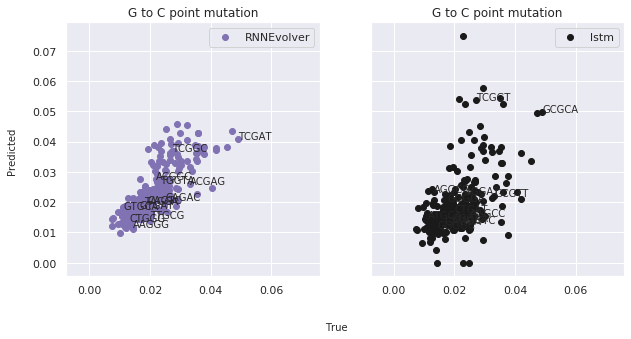

(0.7804986141166683, 9.704273974732146e-54) (0.5311769245760988, 4.852939646977583e-20)


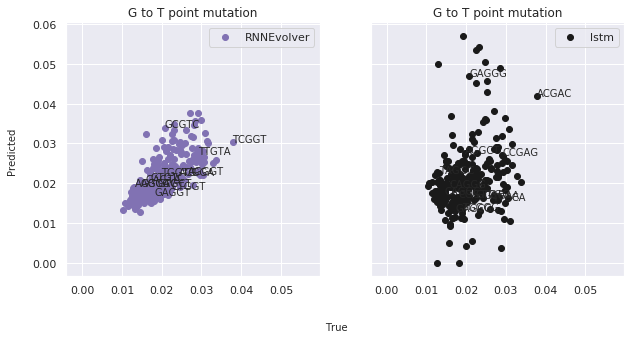

(0.7112283556636048, 9.246642721400924e-41) (0.27400695572114586, 8.664121571716709e-06)


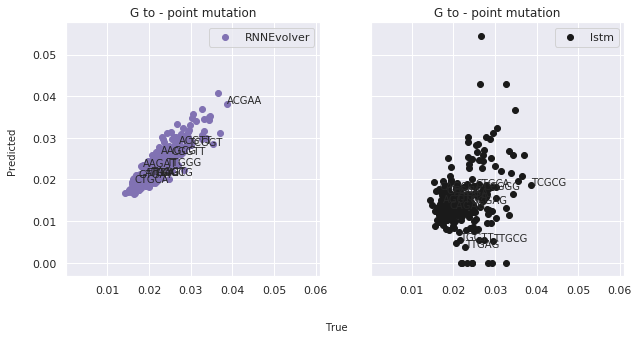

(0.8892133174898813, 3.070778530565905e-88) (0.29814035213389506, 1.1868061596768964e-06)


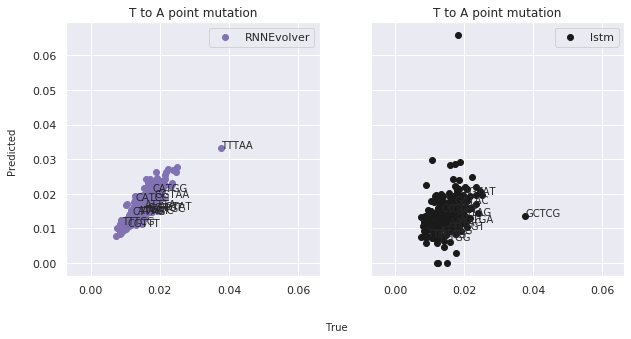

(0.8478723168340795, 5.996407496377225e-72) (0.31203862577191654, 3.469182668191283e-07)


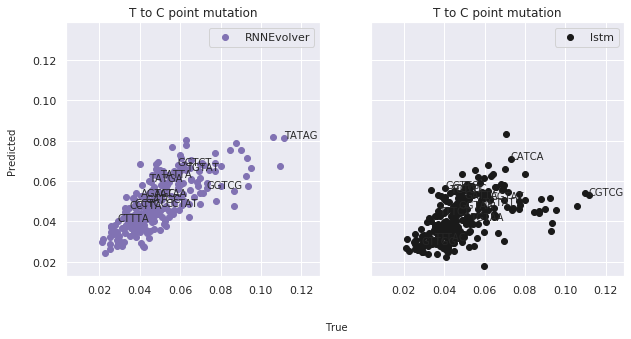

(0.7427840022734686, 3.738016712062765e-46) (0.5306561833333467, 5.356583530210402e-20)


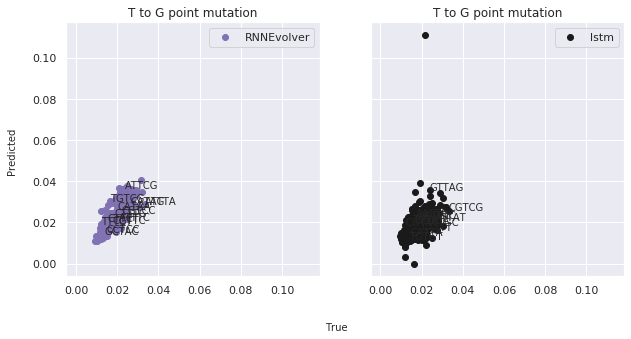

(0.7884242156801367, 1.5821395549999302e-55) (0.34747891965755323, 1.1204221518666556e-08)


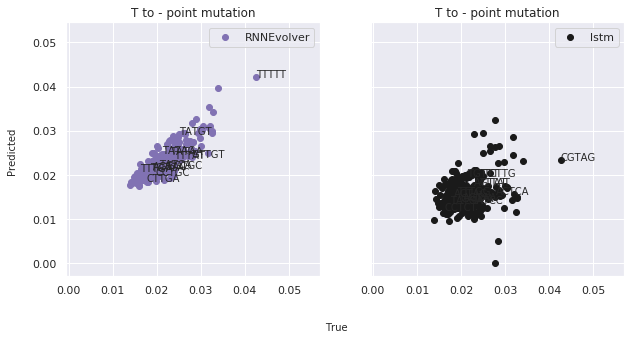

(0.8500501463809973, 1.1128962929952043e-72) (0.26099074631769903, 2.347945856907407e-05)


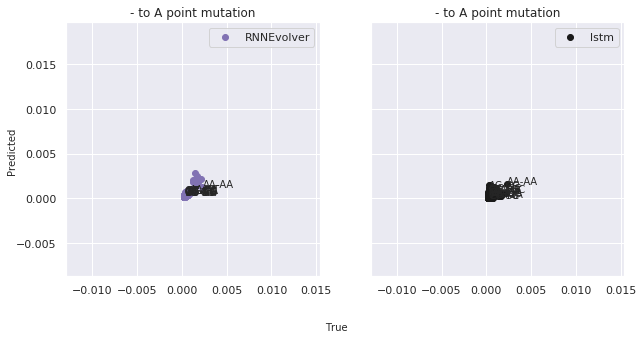

(0.8572281336465244, 3.555424076058251e-75) (0.2901081032470098, 2.34764575986332e-06)


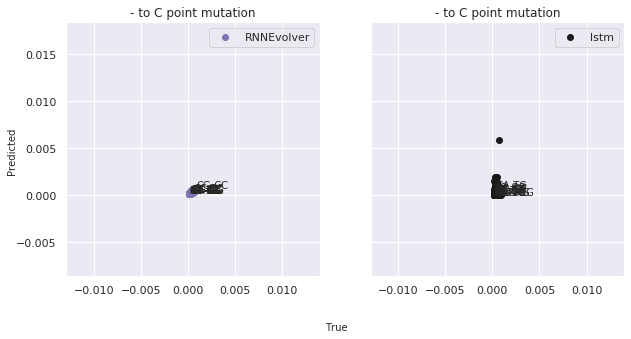

(0.8289044575622264, 5.004902631606412e-66) (0.21884964529347917, 0.0004197999598805278)


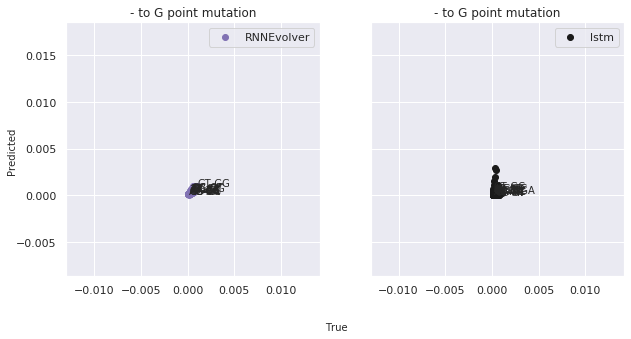

(0.8807570023547062, 1.9997618647430623e-84) (0.10434913528609466, 0.09572007588438897)


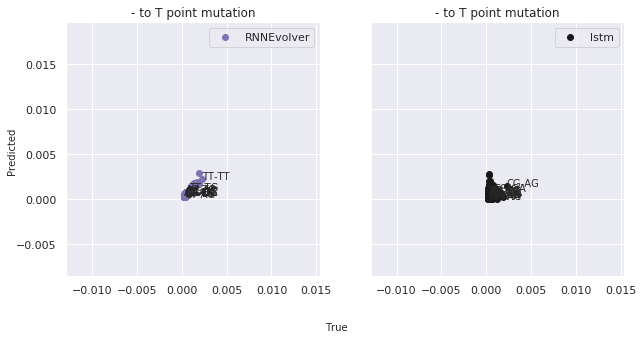

(0.9319958249601592, 6.084558774665216e-114) (0.15553382102131896, 0.012718941268333055)


In [4]:
# inputAll, inputAll2, predAll, outputAll= decodeList(inputAll, predAll, outputAll)
# lstm_inputAll, lstm_inputAll2, lstm_predAll, lstm_outputAll = decodeList(lstm_inputAll, lstm_predAll, lstm_outputAll)

ancCase = ['A','C','G','T']
desCase = ['A','C','G','T','-']
for i in tqdm_notebook(ancCase):
    for j in desCase:
        contextMut(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
        contextMut(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
        contextMut(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
ancCase = ['-']
desCase = ['A','C','G','T','-']
for i in tqdm_notebook(ancCase):
    for j in desCase:
        contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
        contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
        contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
        

    

ancCase = ['A','C','G','T','-']
desCase = ['A','C','G','T','-']
for i in ancCase:
    for j in desCase:
        if i != j:
            plotPointMut(numBin,i, j)



for i in ancCase:
    for j in desCase:
        if i != j:
            plotScatter(numBin,i, j)

In [5]:
# contextLen = 3
# ancCase = ['A','C','G','T']
# desCase = ['A','C','G','T','-']
# for i in tqdm_notebook(ancCase):
#     for j in desCase:
#         contextMut(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
#         contextMut(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
#         contextMut(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
# ancCase = ['-']
# desCase = ['A','C','G','T','-']
# for i in tqdm_notebook(ancCase):
#     for j in desCase:
#         contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
#         contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
#         contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
# ancCase = ['A','C','G','T','-']
# desCase = ['A','C','G','T','-']
# for i in ancCase:
#     for j in desCase:
#         if i != j:
#             plotPointMut(numBin,i, j)
# for i in ancCase:
#     for j in desCase:
#         if i != j:
#             plotScatter(numBin,i, j)

In [6]:
def analyzeMut(ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()

#     print(list(predSeq.keys())[:256])
#     print(list(trueSeq.keys())[:256])
    print(predSeq)
#     print(trueSeq)
    
analyzeMut('A','G')

{'CTACG': 0.10929292929292929, 'CAACG': 0.10838396941353177, 'CTATG': 0.10401051110744795, 'CAATC': 0.10309035889556123, 'CAATG': 0.10074938166783565, 'CAATT': 0.09980878658795096, 'CAACC': 0.09937264982584224, 'GTACG': 0.09717783272025568, 'CAACT': 0.09483513276918587, 'CTATT': 0.09445991627695165, 'CTATC': 0.09386017714334853, 'CTATA': 0.09335316561050176, 'CGACC': 0.09023345989175216, 'CTACC': 0.08960887854649602, 'CTAGT': 0.0886848862581524, 'CGATC': 0.08817527151603294, 'CTAGG': 0.08806572725701808, 'CAATA': 0.08745378561599097, 'CGACG': 0.08645659266332457, 'CAAGC': 0.08609404805656184, 'CTAGC': 0.08603334037947095, 'CTACT': 0.08504849973591327, 'CGACT': 0.08488775443419072, 'CAAGT': 0.08436192966198146, 'CGATG': 0.084296258589972, 'CGATT': 0.08391595319101208, 'CAACA': 0.08347210336230254, 'CTACA': 0.08343972437433324, 'GAACG': 0.08160159921232826, 'CAAGG': 0.08014397376099504, 'ATACG': 0.07992719433105373, 'GGACC': 0.07919724005669974, 'CTAGA': 0.07898739897593983, 'GTATG': 0.0

In [7]:
contextLength = 1
numBin = 16
def contextMut(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont = list(itertools.product('ACGT', repeat=size))
    cont1 = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont1:
        for j in cont1:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc :
                count_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc and b[i+size+int(len(ancNuc)/2)] == desNuc:
                context_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def contextMutInsert(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont1 = list(itertools.product('ACGT', repeat=size-1))
    cont = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont:
        for j in cont:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            count_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            inserted_nuc = inv_dict[b[i+size+int(len(ancNuc)/2)-1]]
            if len(inserted_nuc) >1 and inserted_nuc[1] == desNuc:
                context_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def calculateR(contextLen, ancCase, desCase):
    sorted_context = contextMut(contextLen, ancCase, desCase, inputAll, predAll, pred = True, evol = False)
    contextMut(contextLen, ancCase, desCase, inputAll, outputAll, pred = False, evol = False)
    contextMut(contextLen, ancCase, desCase, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)

    sorted_word = list(sorted_context.keys())
    top = sorted_word[0]
    mid = sorted_word[int(len(sorted_word)/2)]
    bot = sorted_word[-1]
    return top, mid, bot

def calculateRInsert(contextLen, ancCase, desCase):
    sorted_context = contextMutInsert(contextLen, ancCase, desCase, inputAll, predAll, pred = True, evol = False)
    contextMutInsert(contextLen, ancCase, desCase, inputAll, outputAll, pred = False, evol = False)
    contextMutInsert(contextLen, ancCase, desCase, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)

    sorted_word = list(sorted_context.keys())
    top = sorted_word[0]
    mid = sorted_word[int(len(sorted_word)/2)]
    bot = sorted_word[-1]
    return top, mid, bot
    
def plotContextChange(contLen, ancCase, desCase, insert = False):
    contextLen = contLen
    if insert == True:
        top, mid, bot = calculateRInsert(contextLen, ancCase, desCase)
        
        tt, tm, tb = calculateRInsert(contextLen, top, desCase)
        mt, mm, mb = calculateRInsert(contextLen, mid, desCase)
        bt, bm, bb = calculateRInsert(contextLen, bot, desCase)

        ttt, ttm, ttb = calculateRInsert(contextLen, tt, desCase)
        mmt, mmm, mmb = calculateRInsert(contextLen, mm, desCase)
        bbt, bbm, bbb = calculateRInsert(contextLen, bb, desCase)
    else :
        top, mid, bot = calculateR(contextLen, ancCase, desCase)
        tt, tm, tb = calculateR(contextLen, top, desCase)
        mt, mm, mb = calculateR(contextLen, mid, desCase)
        bt, bm, bb = calculateR(contextLen, bot, desCase)

        ttt, ttm, ttb = calculateR(contextLen, tt, desCase)
        mmt, mmm, mmb = calculateR(contextLen, mm, desCase)
        bbt, bbm, bbb = calculateR(contextLen, bb, desCase)
    
#     calculateR(contextLen, ttt, desCase)
#     calculateR(contextLen, mmm, desCase)
#     calculateR(contextLen, bbb, desCase)

    # for i in tqdm_notebook(ancCase):
    #     for j in desCase:
    #         contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
    #         contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
    #         contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
    topList = [ancCase, top, tt]
    midList = [ancCase, mid, mm]
    botList = [ancCase, bot, bb]
    ancWords = [topList, midList, botList]
    
   #     lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()


    f, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,20))
    axs = axs.flatten()
    f.text(0.5, 0.1, 'True', ha='center', va='center')
    f.text(0.05, 0.5, 'Predicted', ha='center', va='center', rotation='vertical')

    index = 0
    for words in tqdm(ancWords):
        for j in desCase:
            for n, i in enumerate(words):
                if i != j:
                    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(i,j,ancName), allow_pickle = True).item()
                    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(i,j,ancName), allow_pickle = True).item()
                    true = list(trueSeq.values())
                    true_context = list(trueSeq.keys())
                    pred = []
                    for x in true_context:
                        pred.append(predSeq[x])
                    axs[index].scatter(true, pred, color = 'm')
                    axs[index].axis('scaled')
                    axs[index].axis('square')
                    axs[index].set_title('x{}y to {} point mutation'.format(i, j))
                    for i, txt in enumerate(list(trueSeq.keys())):
                        if i %2 ==0:
                            axs[index].annotate(txt, (true[i], pred[i]))

                    index += 1
                    print('pearson corr: ', stats.pearsonr(pred, true)[0])
    plt.show()
    plt.close()
#                     plotPointMut(numBin,i, j)
#                     plotScatter(numBin,i, j)
#     analyzeMut(ancCase[0],desCase[0])

100%|██████████| 3/3 [00:00<00:00, 39.68it/s]


pearson corr:  0.8918536030682094
pearson corr:  0.8219682838520207
pearson corr:  0.8295645036946477
pearson corr:  0.8918536030682094
pearson corr:  0.8445444439181071
pearson corr:  0.2316696099037218
pearson corr:  0.8918536030682094
pearson corr:  0.5054315149124291
pearson corr:  0.618530088271334


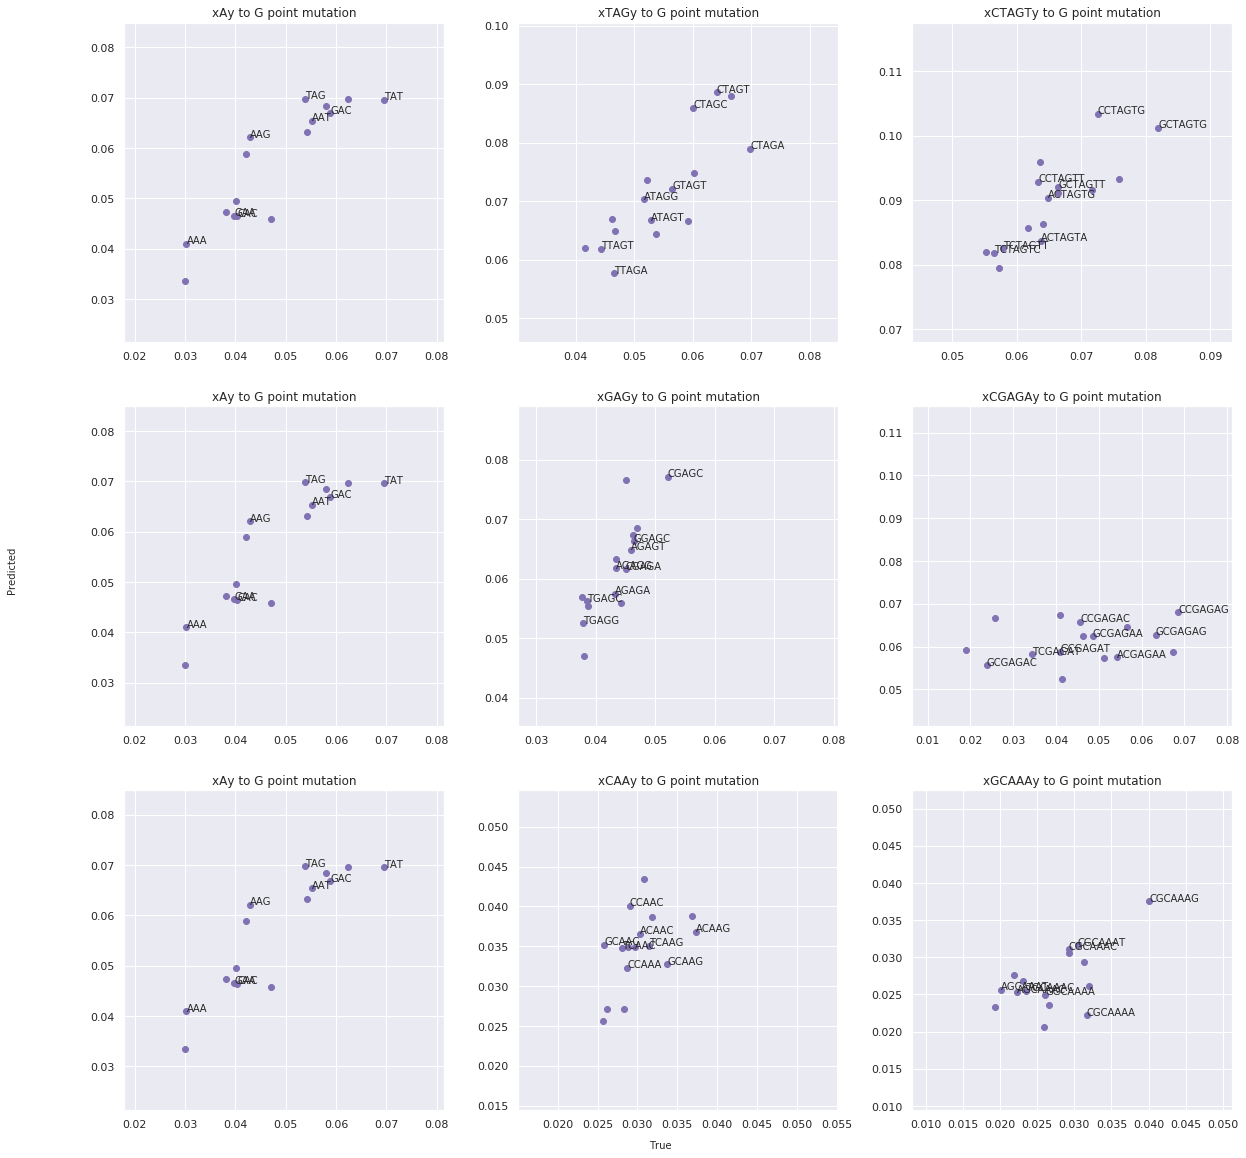

100%|██████████| 3/3 [00:00<00:00, 52.87it/s]


pearson corr:  0.9892166690393528
pearson corr:  0.7222849392635868
pearson corr:  -0.25658855819968746
pearson corr:  0.9892166690393528
pearson corr:  0.04215649747953419
pearson corr:  0.09936765780377477
pearson corr:  0.9892166690393528
pearson corr:  0.6602528805288772
pearson corr:  0.536126897825327


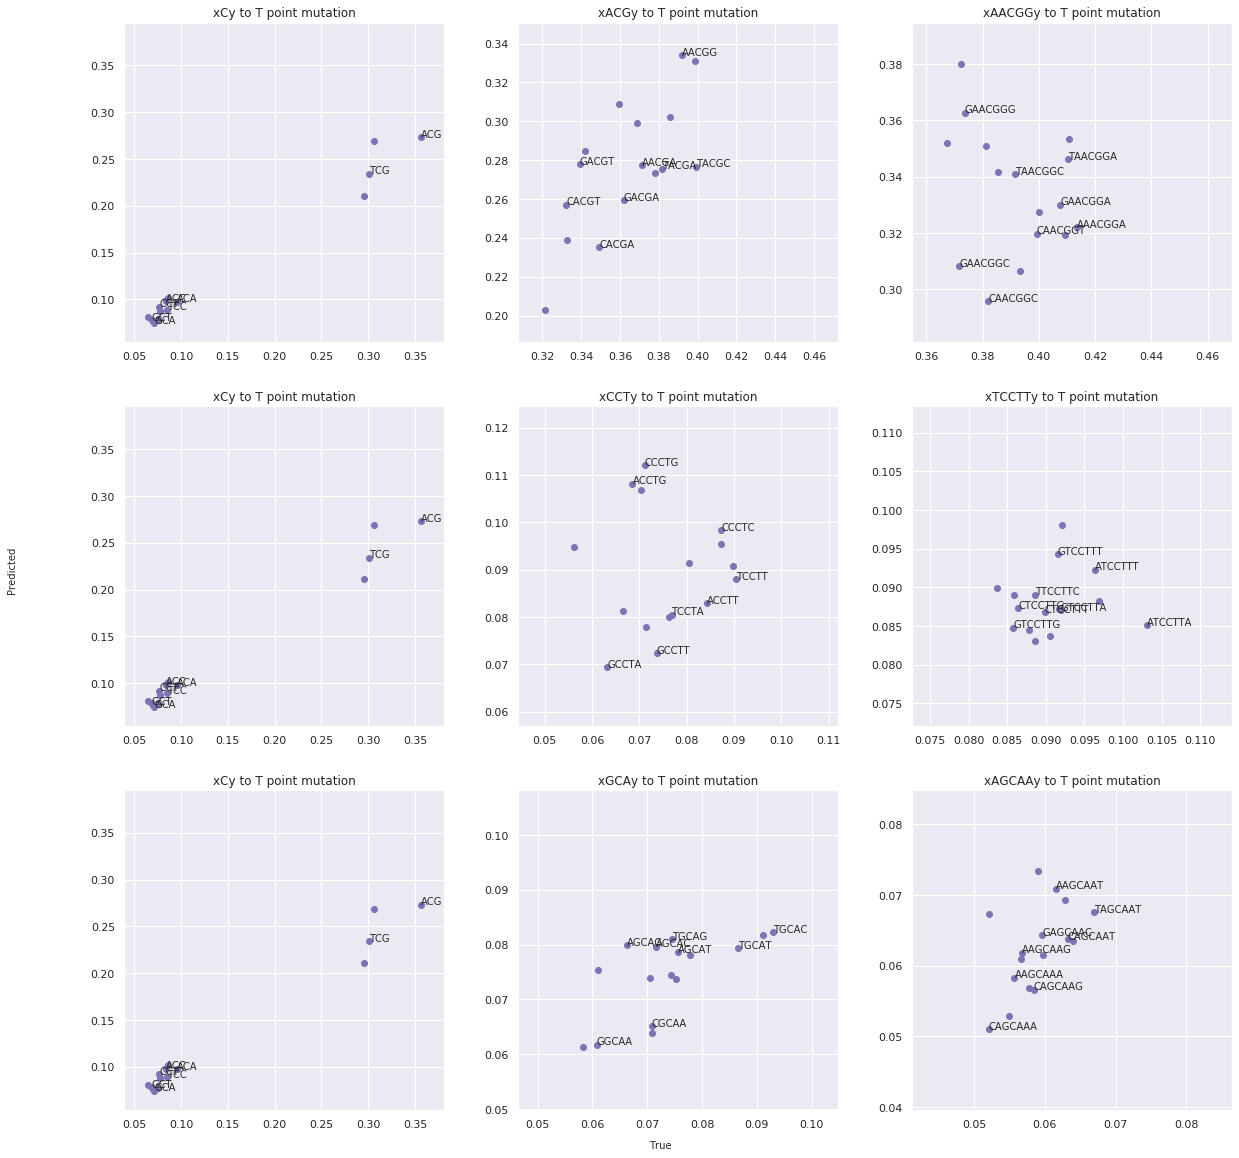

100%|██████████| 3/3 [00:00<00:00, 48.97it/s]


pearson corr:  0.971773771986592
pearson corr:  0.6758739726648446
pearson corr:  0.6687795393175071
pearson corr:  0.971773771986592
pearson corr:  0.7526966417217086
pearson corr:  0.7497976857267242
pearson corr:  0.971773771986592
pearson corr:  0.8831790094294524
pearson corr:  0.0884501386533484


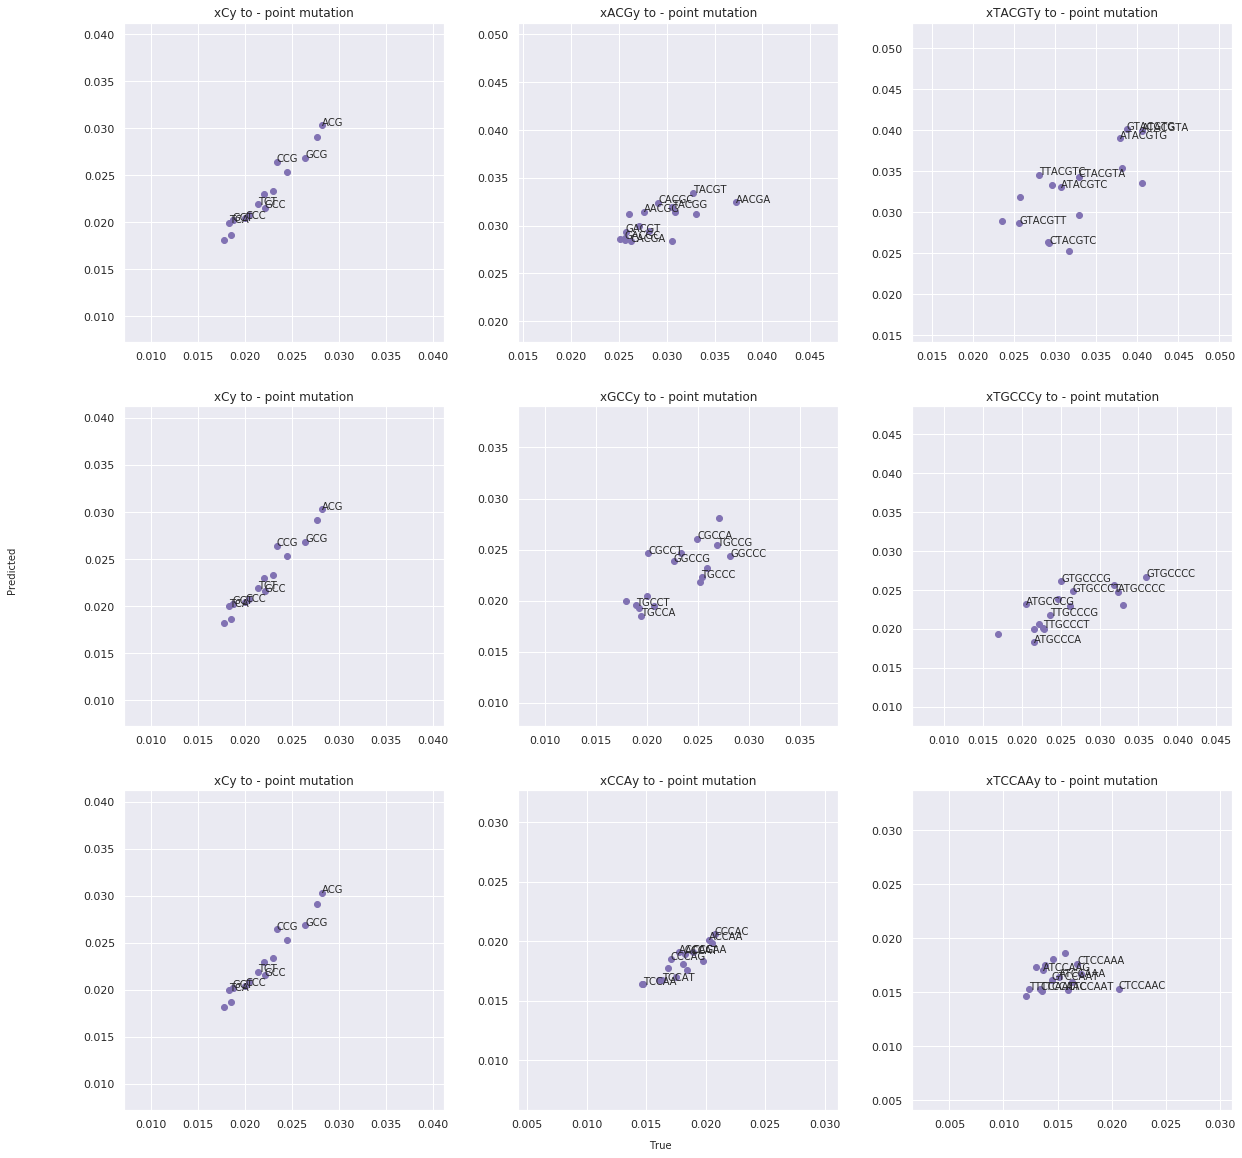

100%|██████████| 3/3 [00:00<00:00, 45.96it/s]


pearson corr:  0.967767884380627
pearson corr:  0.956179105625167
pearson corr:  0.9764595718610833
pearson corr:  0.967767884380627
pearson corr:  0.956179105625167
pearson corr:  0.9764595718610833
pearson corr:  0.967767884380627
pearson corr:  0.956179105625167
pearson corr:  0.9764595718610833


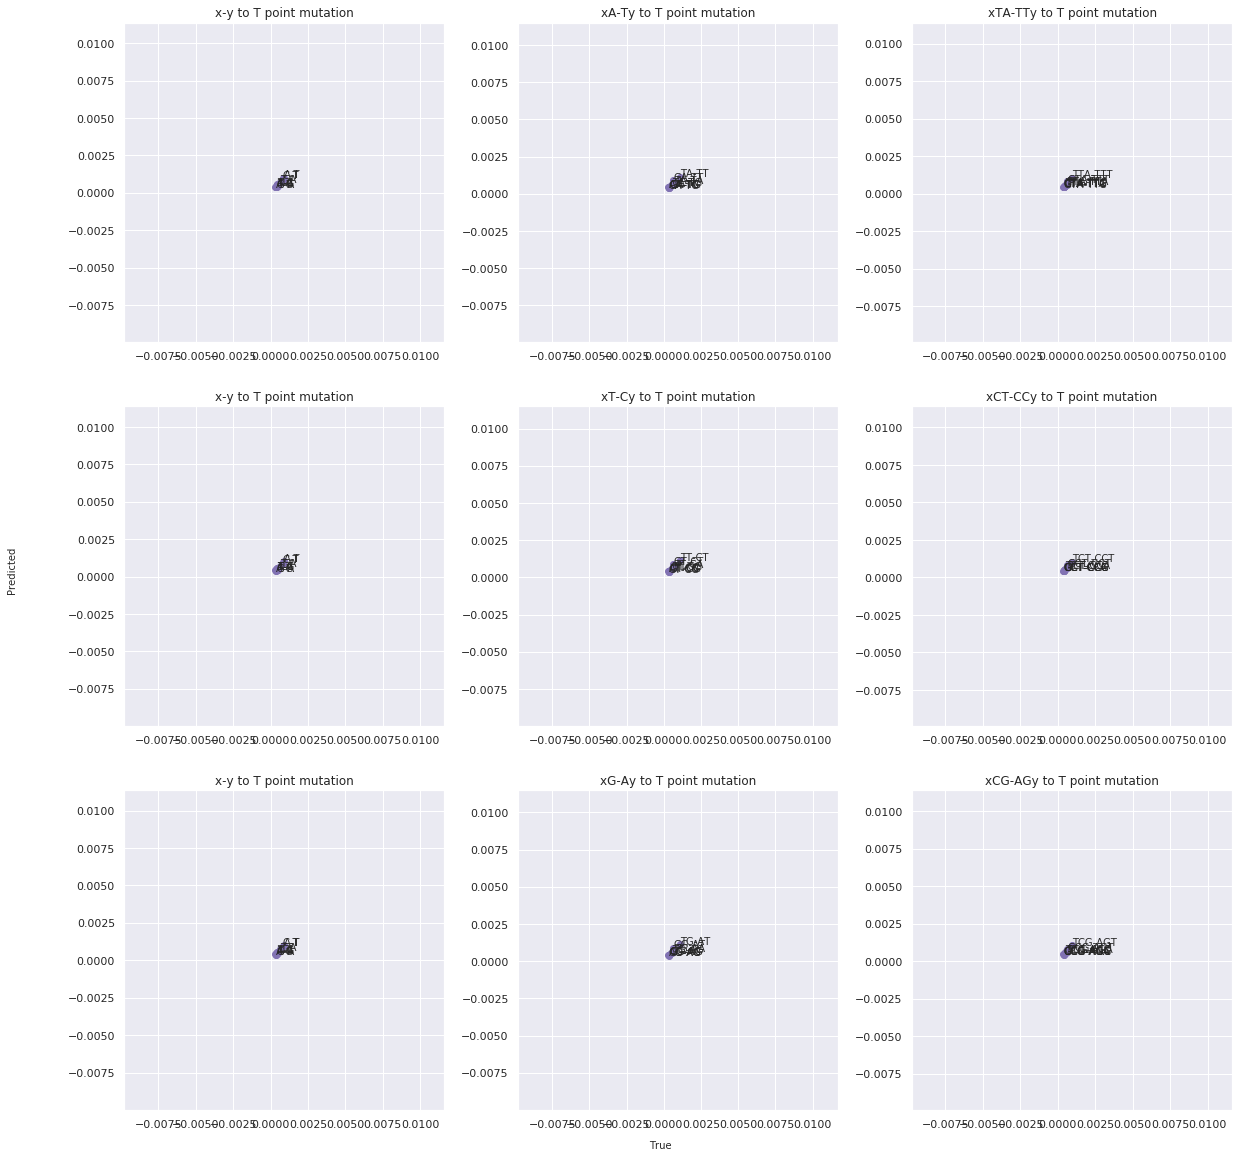

In [8]:
plotContextChange(1, 'A', 'G', insert = False)
plotContextChange(1, 'C', 'T', insert = False)
plotContextChange(1, 'C', '-', insert = False)
plotContextChange(1, '-', 'T', insert = True)

In [9]:
analyzeMut('TAG','G')
contextMut(contextLen, 'TAG', 'G', inputAll, predAll, pred = True, evol = False)

{'CTAGT': 0.0886848862581524, 'CTAGG': 0.08806572725701808, 'CTAGC': 0.08603334037947095, 'CTAGA': 0.07898739897593983, 'GTAGG': 0.07486719591117211, 'GTAGC': 0.0735966735966736, 'GTAGT': 0.07214105727677464, 'ATAGG': 0.07033041839032309, 'ATAGC': 0.06705408303636226, 'ATAGT': 0.06672982889993335, 'GTAGA': 0.06657928988158625, 'TTAGG': 0.0649175521575742, 'ATAGA': 0.06446141054663082, 'TTAGC': 0.062065513337512514, 'TTAGT': 0.0619098986888491, 'TTAGA': 0.05775052483553244}


{'GCTAGCG': 0.12,
 'CCTAGCG': 0.11,
 'ACTAGCG': 0.11,
 'GGTAGCG': 0.11,
 'TCTAGCG': 0.10,
 'CCTAGTG': 0.10,
 'CGTAGCG': 0.10,
 'CCTAGGG': 0.10,
 'GCTAGTG': 0.10,
 'GCTAGGG': 0.10,
 'TGTAGCG': 0.10,
 'GCTAGAG': 0.10,
 'CCTAGCC': 0.10,
 'CCTAGTC': 0.10,
 'CCTAGGT': 0.10,
 'GCTAGGA': 0.10,
 'CCTAGCT': 0.10,
 'GCTAGGT': 0.09,
 'GCTAGTA': 0.09,
 'ACTAGGG': 0.09,
 'CCTAGGC': 0.09,
 'CCTAGTT': 0.09,
 'GCTAGTT': 0.09,
 'CCTAGGA': 0.09,
 'CCTAGAG': 0.09,
 'GCTAGTC': 0.09,
 'CCTAGTA': 0.09,
 'CCTAGCA': 0.09,
 'ACTAGTG': 0.09,
 'GGTAGGG': 0.09,
 'AGTAGCG': 0.09,
 'CGTAGGG': 0.09,
 'CATAGCG': 0.09,
 'GCTAGGC': 0.09,
 'GCTAGCA': 0.09,
 'GCTAGCC': 0.09,
 'GGTAGTG': 0.09,
 'GCTAGCT': 0.09,
 'TCTAGTG': 0.09,
 'TCTAGTA': 0.09,
 'CGTAGTG': 0.09,
 'CGTAGTC': 0.08,
 'GCTAGAT': 0.08,
 'CGTAGGT': 0.08,
 'TCTAGGC': 0.08,
 'ACTAGGT': 0.08,
 'GCTAGAC': 0.08,
 'ACTAGTA': 0.08,
 'GGTAGTA': 0.08,
 'GCTAGAA': 0.08,
 'CCTAGAC': 0.08,
 'ACTAGGA': 0.08,
 'ACTAGCT': 0.08,
 'TCTAGTT': 0.08,
 'ACTAGTC': 0.08,
 'ACTAGAG'